In [188]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [189]:
dataTesis = "datasetNormal.xlsx"
data = pd.read_excel(dataTesis)


In [190]:
data.shape

(21928, 8)

In [191]:
data.head(10)

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,Alto,Medio,Alto,B
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,Urgente,Alto,Alto,B
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,Alto,Alto,Alto,B
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,Urgente,Alto,Alto,C
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,Normal,Medio,Alto,B
5,incidencia,Problemas con SGA,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,Urgente,Alto,Alto,C
6,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,Alto,Medio,Alto,B
7,incidencia,Conexión a VPN,No se puede conectar a vpn.,CONECTIVIDAD,Alto,Alto,Alto,A
8,incidencia,Problemas para conectarse al remoto,problemas para conectarse al remoto,CONECTIVIDAD,Urgente,Alto,Alto,B
9,incidencia,Problemas con VPN,problemas con vpn,CONECTIVIDAD,Alto,Alto,Alto,C


In [192]:
data.tail()

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado
21923,incidencia,Incidencia con monitor,"incidencia con monitor, en la pantalla se refl...",HARDWARE,Alto,Medio,Alto,B
21924,incidencia,Incidencia con DIADEMA,incidencia con diadema,HARDWARE,Alto,Medio,Alto,A
21925,incidencia,Incidencia con DIADEMA,incidencia con diadema,HARDWARE,Alto,Medio,Alto,C
21926,incidencia,Incidencia con DIADEMA,incidencia con diadema,HARDWARE,Alto,Medio,Alto,B
21927,incidencia,Restriccion de horario,restriccion de horario,GESTION DE USUARIOS,Alto,Alto,Alto,A


# EDA — Exploratory Data Analysis 

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21928 entries, 0 to 21927
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tipo         21928 non-null  object
 1   Titulo       21928 non-null  object
 2   Descripción  21928 non-null  object
 3   Categoria    21928 non-null  object
 4   Urgencia     21928 non-null  object
 5   Impacto      21928 non-null  object
 6   Prioridad    21928 non-null  object
 7   Encargado    21928 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


In [194]:
data.isna().sum()

Tipo           0
Titulo         0
Descripción    0
Categoria      0
Urgencia       0
Impacto        0
Prioridad      0
Encargado      0
dtype: int64

In [195]:
(data.isna() == True).sum()

Tipo           0
Titulo         0
Descripción    0
Categoria      0
Urgencia       0
Impacto        0
Prioridad      0
Encargado      0
dtype: int64

In [196]:
data["Urgencia"] = data["Urgencia"].replace("Urgente", 3)
data["Urgencia"] = data["Urgencia"].replace("Alto", 2)
data["Urgencia"] = data["Urgencia"].replace("Normal", 1)

data["Impacto"] = data["Impacto"].replace("Medio", 1)
data["Impacto"] = data["Impacto"].replace("Alto", 2)

data["Prioridad"] = data["Prioridad"].replace("Alto", 2)
data["Prioridad"] = data["Prioridad"].replace("Medio", 1)

data.head()
data.dtypes

Tipo           object
Titulo         object
Descripción    object
Categoria      object
Urgencia        int64
Impacto         int64
Prioridad       int64
Encargado      object
dtype: object

In [197]:
 data.head()

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,B
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,2,2,2,B
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,C
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,1,1,2,B


In [198]:
convert_dict = {
    'Tipo':str,
    'Titulo':str,
    'Descripción':str,
    'Categoria':str,
    'Urgencia':int,
    'Impacto':int,
    'Prioridad':int,
    'Encargado':str,
}

data = data.astype(convert_dict)

### (21928 documents, 8 features)

In [199]:
data['raw_description'] = data['Titulo'].str.cat(data['Descripción'], sep= ' ', na_rep= '')
data.head()


,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado,raw_description
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,B,Restricción de horario Actualmente venimos pre...
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,2,2,2,B,La PC se apago durante la gestión Actualmente ...
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,C,Problemas con la VPN Actualmente venimos prese...
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,1,1,2,B,Incidencia con IPCC Actualmente venimos presen...


In [200]:
data['raw_word_count'] = [len(desc.split(' ')) for desc in data['raw_description']]
data.head()
word_count_before = data['raw_word_count'].sum()

In [201]:
print("Cantidad total de palbras en el corpus: ", word_count_before)


Cantidad total de palbras en el corpus:  195458


In [202]:
data.head()

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado,raw_description,raw_word_count
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,B,Restricción de horario Actualmente venimos pre...,26
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,2,2,2,B,La PC se apago durante la gestión Actualmente ...,30
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,C,Problemas con la VPN Actualmente venimos prese...,27
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,1,1,2,B,Incidencia con IPCC Actualmente venimos presen...,26


In [203]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

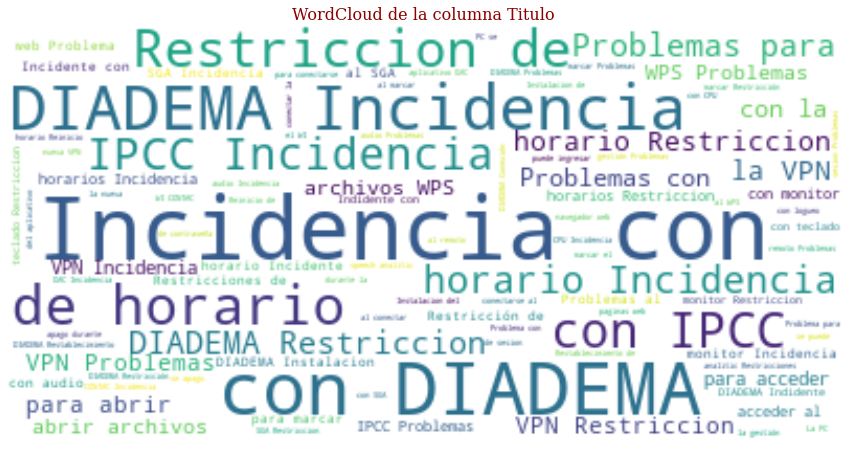

In [204]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(data['Titulo'])
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud de la columna Titulo ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

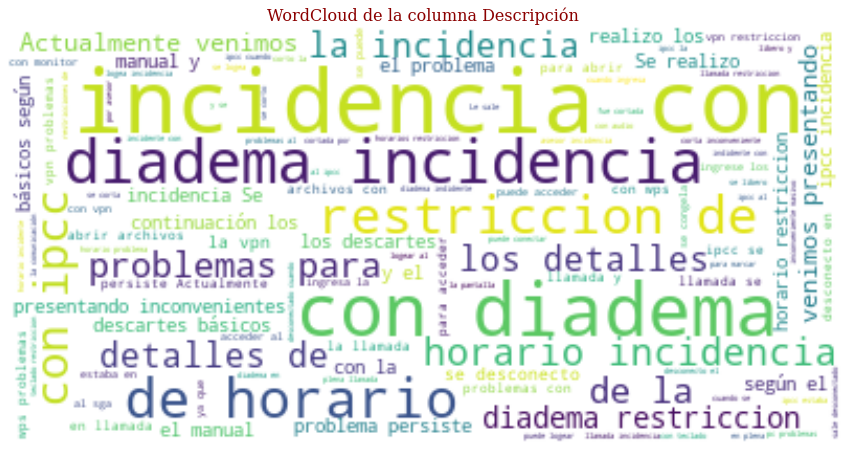

In [205]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(data['Descripción'])
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud de la columna Descripción ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

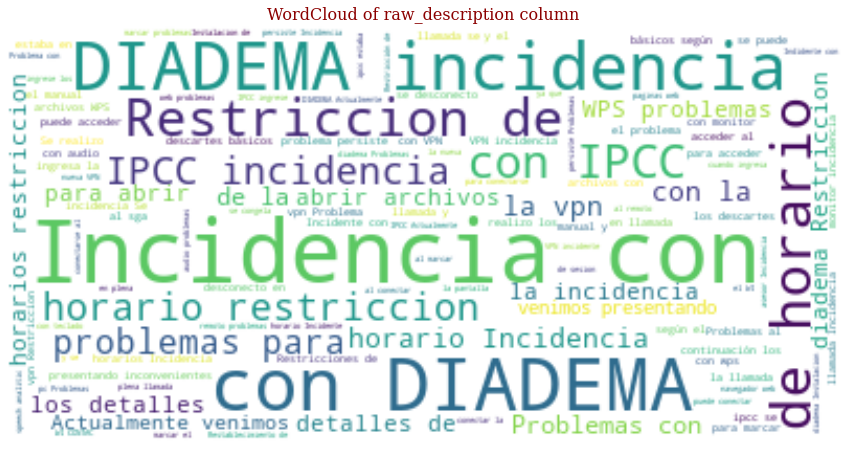

In [206]:
All_words = ""
All_words += " ".join(data.raw_description)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of raw_description column ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<AxesSubplot:title={'center':'Distribucion de Clases'}>

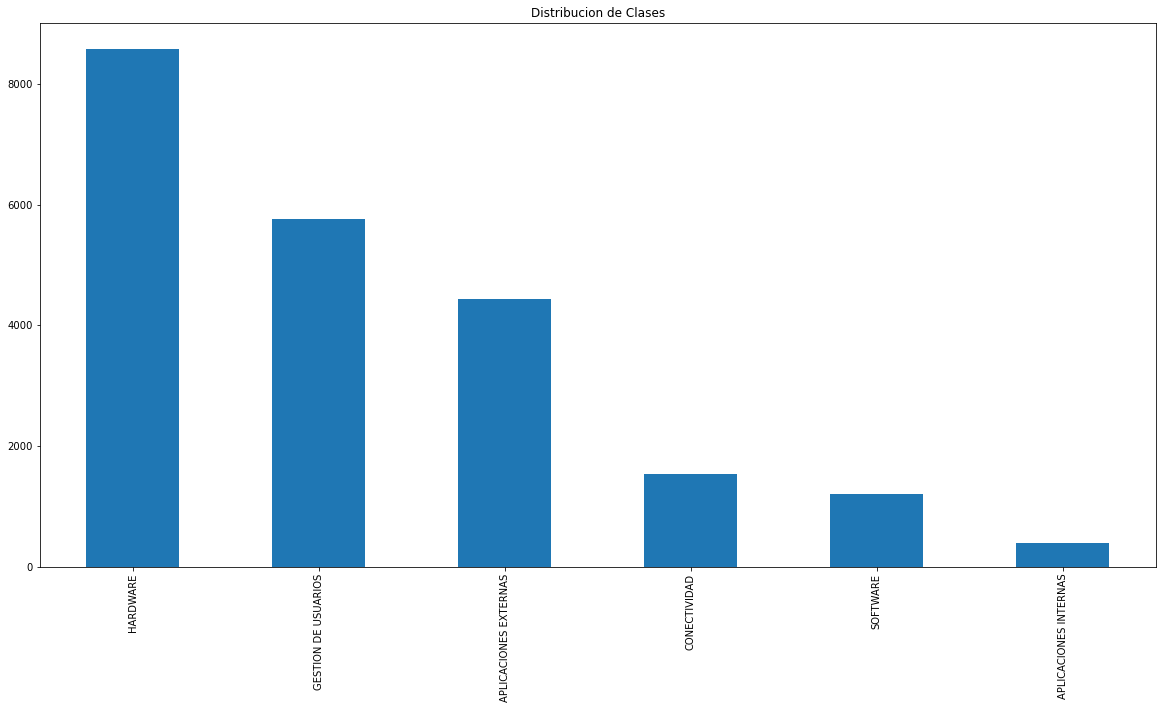

In [207]:
data['Categoria'].value_counts().plot(kind='bar', figsize=(20,10), title='Distribucion de Clases')

In [208]:
wordcloud.to_file("primer_review.png")

## Pre-Procesamiento de los datos

In [209]:
def removerString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [210]:
def limpiarDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset

In [211]:
data.head()

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado,raw_description,raw_word_count
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,B,Restricción de horario Actualmente venimos pre...,26
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,2,2,2,B,La PC se apago durante la gestión Actualmente ...,30
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,C,Problemas con la VPN Actualmente venimos prese...,27
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,1,1,2,B,Incidencia con IPCC Actualmente venimos presen...,26


In [212]:
 data['data_clean'] = data['raw_description']
data.head()

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado,raw_description,raw_word_count,data_clean
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26,Incidencia con DIADEMA Actualmente venimos pre...
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,B,Restricción de horario Actualmente venimos pre...,26,Restricción de horario Actualmente venimos pre...
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,2,2,2,B,La PC se apago durante la gestión Actualmente ...,30,La PC se apago durante la gestión Actualmente ...
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,C,Problemas con la VPN Actualmente venimos prese...,27,Problemas con la VPN Actualmente venimos prese...
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,1,1,2,B,Incidencia con IPCC Actualmente venimos presen...,26,Incidencia con IPCC Actualmente venimos presen...


In [213]:
#data.drop('dataClean',
#  axis='columns', inplace=True)

## NLP Essentials : Stopwords Removal & Text Normalization (Lemmetization)
#### Remove Stopwords
Text Classification
Spam Filtering
Language Classification
Genre Classification
Caption Generation
Auto-Tag Generation

#### Avoid Stopword Removal
Machine Translation
Language Modeling
Text Summarization
Question-Answering problems (Chatbots)

In [214]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
# We will not do stemming, instead use more intelligent way to get the root word using  lemmatization
from nltk.stem import WordNetLemmatizer

In [215]:
 nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) 
import nltk

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [216]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jose\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [217]:
#stop_words

In [218]:
#nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [219]:
processed_all_documents = list()

for desc in data['data_clean']:
    word_tokens = word_tokenize(desc) 
    
    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    # Lemmetization
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)    

In [220]:
len(processed_all_documents)

21928

In [221]:
data['clean_description'] = processed_all_documents


In [222]:
data.head(10)

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado,raw_description,raw_word_count,data_clean,clean_description
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26,Incidencia con DIADEMA Actualmente venimos pre...,Incidencia DIADEMA Actualmente venimos present...
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,B,Restricción de horario Actualmente venimos pre...,26,Restricción de horario Actualmente venimos pre...,Restricción horario Actualmente venimos presen...
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,2,2,2,B,La PC se apago durante la gestión Actualmente ...,30,La PC se apago durante la gestión Actualmente ...,La PC apago gestión Actualmente venimos presen...
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,C,Problemas con la VPN Actualmente venimos prese...,27,Problemas con la VPN Actualmente venimos prese...,Problemas VPN Actualmente venimos presentando ...
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,1,1,2,B,Incidencia con IPCC Actualmente venimos presen...,26,Incidencia con IPCC Actualmente venimos presen...,Incidencia IPCC Actualmente venimos presentand...
5,incidencia,Problemas con SGA,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,3,2,2,C,Problemas con SGA Actualmente venimos presenta...,26,Problemas con SGA Actualmente venimos presenta...,Problemas SGA Actualmente venimos presentando ...
6,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26,Incidencia con DIADEMA Actualmente venimos pre...,Incidencia DIADEMA Actualmente venimos present...
7,incidencia,Conexión a VPN,No se puede conectar a vpn.,CONECTIVIDAD,2,2,2,A,Conexión a VPN No se puede conectar a vpn.,9,Conexión a VPN No se puede conectar a vpn.,Conexión VPN No puede conectar vpn .
8,incidencia,Problemas para conectarse al remoto,problemas para conectarse al remoto,CONECTIVIDAD,3,2,2,B,Problemas para conectarse al remoto problemas ...,10,Problemas para conectarse al remoto problemas ...,Problemas conectarse remoto problemas conectar...
9,incidencia,Problemas con VPN,problemas con vpn,CONECTIVIDAD,2,2,2,C,Problemas con VPN problemas con vpn,6,Problemas con VPN problemas con vpn,Problemas VPN problemas vpn


In [223]:
data['clean_word_count'] = [len(desc.split(' ')) for desc in data['clean_description']]

wordCount_after = data['clean_word_count'].sum()
print("Total de palabras (stopWords) remividos & Lematización", wordCount_after)
print("Maxima cantidad de palabras de un Documento: ", data['clean_word_count'].max())
print("Promedio de cantidad de palabras de un Documento: ", data['clean_word_count'].mean())

Total de palabras (stopWords) remividos & Lematización 132062
Maxima cantidad de palabras de un Documento:  22
Promedio de cantidad de palabras de un Documento:  6.022528274352426


In [224]:
print("Diferencia en el total de cantidad de palabras antes y despues del preprocesamiento: ", (word_count_before - wordCount_after))

Diferencia en el total de cantidad de palabras antes y despues del preprocesamiento:  63396


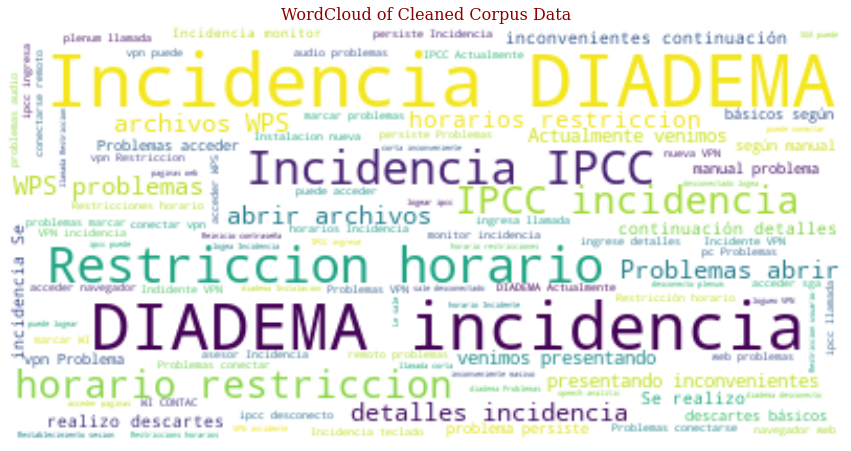

In [225]:
All_words = ""
All_words += " ".join(data.clean_description)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Cleaned Corpus Data", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###  Class Imbalance


In [226]:
group_frequency = dict(data['Categoria'].value_counts())
group_frequency

{'HARDWARE': 8580,
 'GESTION DE USUARIOS': 5768,
 'APLICACIONES EXTERNAS': 4440,
 'CONECTIVIDAD': 1540,
 'SOFTWARE': 1210,
 'APLICACIONES INTERNAS': 390}

In [227]:
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(35)

,frequency,percent representation,cumulative percentage
HARDWARE,8580,0.391281,0.391281
GESTION DE USUARIOS,5768,0.263043,0.654323
APLICACIONES EXTERNAS,4440,0.202481,0.856804
CONECTIVIDAD,1540,0.070230,0.927034
SOFTWARE,1210,0.055181,0.982215
APLICACIONES INTERNAS,390,0.017785,1.000000


In [228]:
group_frequency_filtered = dict(filter(lambda x: x[1] >= 390, group_frequency.items()))
print (group_frequency_filtered)

{'HARDWARE': 8580, 'GESTION DE USUARIOS': 5768, 'APLICACIONES EXTERNAS': 4440, 'CONECTIVIDAD': 1540, 'SOFTWARE': 1210, 'APLICACIONES INTERNAS': 390}


In [229]:
valid_grp_list = list(group_frequency_filtered)
clean_tickets_df = data[data['Categoria'].isin(valid_grp_list)]
clean_tickets_df.head(10)

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado,raw_description,raw_word_count,data_clean,clean_description,clean_word_count
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26,Incidencia con DIADEMA Actualmente venimos pre...,Incidencia DIADEMA Actualmente venimos present...,20
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,B,Restricción de horario Actualmente venimos pre...,26,Restricción de horario Actualmente venimos pre...,Restricción horario Actualmente venimos presen...,20
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,2,2,2,B,La PC se apago durante la gestión Actualmente ...,30,La PC se apago durante la gestión Actualmente ...,La PC apago gestión Actualmente venimos presen...,22
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,C,Problemas con la VPN Actualmente venimos prese...,27,Problemas con la VPN Actualmente venimos prese...,Problemas VPN Actualmente venimos presentando ...,20
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,1,1,2,B,Incidencia con IPCC Actualmente venimos presen...,26,Incidencia con IPCC Actualmente venimos presen...,Incidencia IPCC Actualmente venimos presentand...,20
5,incidencia,Problemas con SGA,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,3,2,2,C,Problemas con SGA Actualmente venimos presenta...,26,Problemas con SGA Actualmente venimos presenta...,Problemas SGA Actualmente venimos presentando ...,20
6,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26,Incidencia con DIADEMA Actualmente venimos pre...,Incidencia DIADEMA Actualmente venimos present...,20
7,incidencia,Conexión a VPN,No se puede conectar a vpn.,CONECTIVIDAD,2,2,2,A,Conexión a VPN No se puede conectar a vpn.,9,Conexión a VPN No se puede conectar a vpn.,Conexión VPN No puede conectar vpn .,7
8,incidencia,Problemas para conectarse al remoto,problemas para conectarse al remoto,CONECTIVIDAD,3,2,2,B,Problemas para conectarse al remoto problemas ...,10,Problemas para conectarse al remoto problemas ...,Problemas conectarse remoto problemas conectar...,6
9,incidencia,Problemas con VPN,problemas con vpn,CONECTIVIDAD,2,2,2,C,Problemas con VPN problemas con vpn,6,Problemas con VPN problemas con vpn,Problemas VPN problemas vpn,4


In [230]:
data['Categoria'].value_counts().sum()

21928

In [231]:
len(data['Categoria'].value_counts())


6

### WordCloud of Cleaned & Class Balanced Corpus Data after dropping poorly represented classes


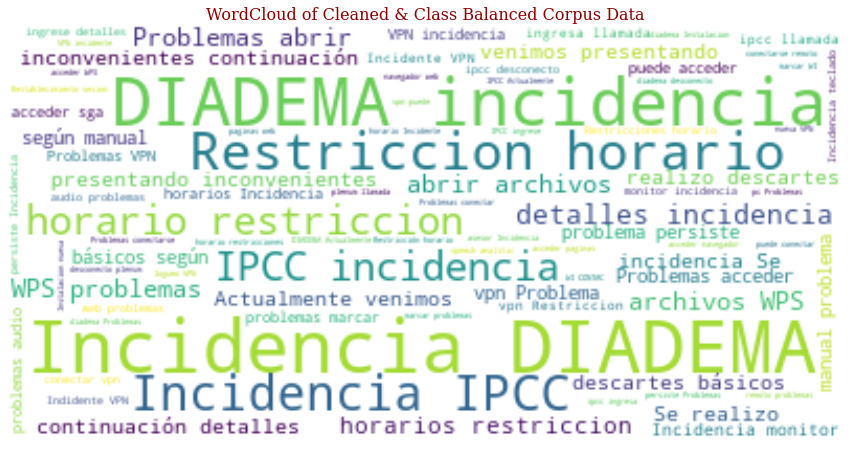

In [232]:
All_words = ""
All_words += " ".join(data.clean_description)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Cleaned & Class Balanced Corpus Data", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Observation

### 1. Number of classes reduced from 74 to 34, rows corresponding to the weakly represented classes are dropped.


### 2. Number of records reduced from 8500 to 8113


In [233]:
le = preprocessing.LabelEncoder()
data["LabelEncodings"] = le.fit_transform(data["Categoria"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

6


In [234]:
data.head(10)

,Tipo,Titulo,Descripción,Categoria,Urgencia,Impacto,Prioridad,Encargado,raw_description,raw_word_count,data_clean,clean_description,clean_word_count,LabelEncodings
0,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26,Incidencia con DIADEMA Actualmente venimos pre...,Incidencia DIADEMA Actualmente venimos present...,20,4
1,incidencia,Restricción de horario,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,B,Restricción de horario Actualmente venimos pre...,26,Restricción de horario Actualmente venimos pre...,Restricción horario Actualmente venimos presen...,20,3
2,incidencia,La PC se apago durante la gestión,Actualmente venimos presentando inconvenientes...,HARDWARE,2,2,2,B,La PC se apago durante la gestión Actualmente ...,30,La PC se apago durante la gestión Actualmente ...,La PC apago gestión Actualmente venimos presen...,22,4
3,incidencia,Problemas con la VPN,Actualmente venimos presentando inconvenientes...,GESTION DE USUARIOS,3,2,2,C,Problemas con la VPN Actualmente venimos prese...,27,Problemas con la VPN Actualmente venimos prese...,Problemas VPN Actualmente venimos presentando ...,20,3
4,incidencia,Incidencia con IPCC,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,1,1,2,B,Incidencia con IPCC Actualmente venimos presen...,26,Incidencia con IPCC Actualmente venimos presen...,Incidencia IPCC Actualmente venimos presentand...,20,0
5,incidencia,Problemas con SGA,Actualmente venimos presentando inconvenientes...,APLICACIONES EXTERNAS,3,2,2,C,Problemas con SGA Actualmente venimos presenta...,26,Problemas con SGA Actualmente venimos presenta...,Problemas SGA Actualmente venimos presentando ...,20,0
6,incidencia,Incidencia con DIADEMA,Actualmente venimos presentando inconvenientes...,HARDWARE,2,1,2,B,Incidencia con DIADEMA Actualmente venimos pre...,26,Incidencia con DIADEMA Actualmente venimos pre...,Incidencia DIADEMA Actualmente venimos present...,20,4
7,incidencia,Conexión a VPN,No se puede conectar a vpn.,CONECTIVIDAD,2,2,2,A,Conexión a VPN No se puede conectar a vpn.,9,Conexión a VPN No se puede conectar a vpn.,Conexión VPN No puede conectar vpn .,7,2
8,incidencia,Problemas para conectarse al remoto,problemas para conectarse al remoto,CONECTIVIDAD,3,2,2,B,Problemas para conectarse al remoto problemas ...,10,Problemas para conectarse al remoto problemas ...,Problemas conectarse remoto problemas conectar...,6,2
9,incidencia,Problemas con VPN,problemas con vpn,CONECTIVIDAD,2,2,2,C,Problemas con VPN problemas con vpn,6,Problemas con VPN problemas con vpn,Problemas VPN problemas vpn,4,2


In [235]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

In [236]:
y = np.asarray(data['LabelEncodings'])


In [237]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(data['clean_description'])
print(x_train_counts.shape)


(21928, 127)


In [238]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
print(x_train_tfidf.shape)

(21928, 127)


In [239]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3)

In [240]:
print(len(count_vect.vocabulary_))


127


In [241]:
train_x.shape

(15349, 127)

In [242]:
train_y.shape


(15349,)

In [243]:
train_x[0]

<1x127 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

### Machine Learning Models

In [244]:
compare_results = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])


### Support Vector Machine - Linear

In [245]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("SVM F1 Score: ", f_sc)

SVM-Linerar Score:  0.967624259005928
SVM F1 Score:  0.9667591245108815


In [246]:
compare_results = compare_results.append({'Algorithm Name': 'Linear-SVM','Accuracy':acc_score, 'F1 Score': f_sc}, ignore_index=True)

In [258]:
x_train_countsxxx = count_vect.fit_transform(pd.Series(['Mi laptop no funciona el monitor no prende']))
print(x_train_countsxxx)

  (0, 3)	1
  (0, 2)	1
  (0, 5)	2
  (0, 1)	1
  (0, 0)	1
  (0, 4)	1
  (0, 6)	1


In [257]:
predit_result = clf.predict(x_train_countsxxx)

ValueError: X.shape[1] = 7 should be equal to 127, the number of features at training time

### Naive Bayes

(array([8580.,    0., 5768.,    0., 4440.,    0., 1540.,    0., 1210.,
         390.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

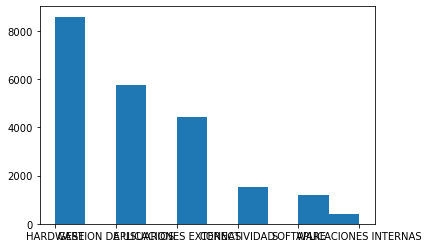

In [43]:
plt.hist(data["Categoria"], bins= 10 )